**Name** : Bodhisatya Ghosh \
**Class** : CSE DS \
**UID** : 2021700026 \
**Subject** : ML \
**Experiment number** : Comparison

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading dataset

In [2]:
df = pd.read_csv('./data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.drop(columns=['Loan_ID'],inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Replacing categorical variable with appropriate numerical values 

In [4]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)
df['Married'].replace({'No':0,'Yes':1},inplace=True)
df['Education'].replace({'Graduate':0,'Not Graduate':1},inplace=True)
df['Self_Employed'].replace({'No':0,'Yes':1},inplace=True)
df['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2},inplace=True)
df['Loan_Status'].replace({'N':0,'Y':1},inplace=True)
df['Dependents'].replace({'3+':3,'2':2,'1':1,'0':0,},inplace=True)

#### Handling mising data

In [5]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.fillna(df.mode(),inplace=True)

In [7]:
df['Married'].unique()

array([ 0.,  1., nan])

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             481 non-null    float64
 1   Married            481 non-null    float64
 2   Dependents         481 non-null    float64
 3   Education          481 non-null    int64  
 4   Self_Employed      481 non-null    float64
 5   ApplicantIncome    481 non-null    int64  
 6   CoapplicantIncome  481 non-null    float64
 7   LoanAmount         481 non-null    float64
 8   Loan_Amount_Term   481 non-null    float64
 9   Credit_History     481 non-null    float64
 10  Property_Area      481 non-null    int64  
 11  Loan_Status        481 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 48.9 KB


#### Checking correlation heatmap to see what parameters have most effect on target variable

<Axes: >

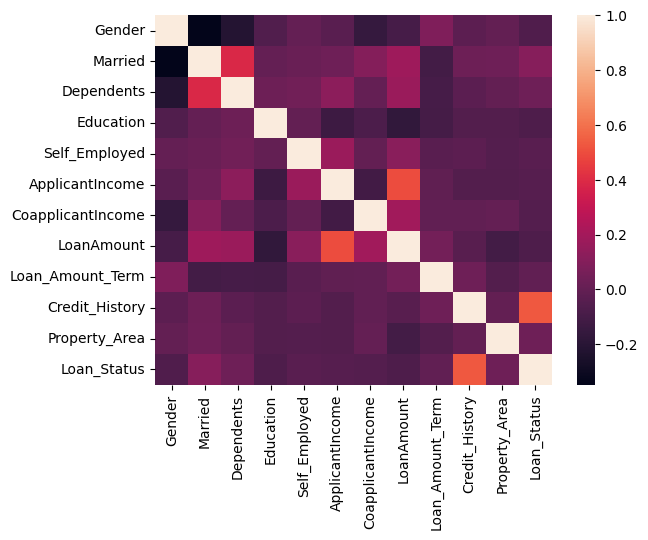

In [10]:
sns.heatmap(df.corr())

In [11]:
df.corr()['Loan_Status']

Gender              -0.065108
Married              0.110176
Dependents           0.034334
Education           -0.069086
Self_Employed       -0.035247
ApplicantIncome     -0.043012
CoapplicantIncome   -0.049817
LoanAmount          -0.072139
Loan_Amount_Term    -0.007411
Credit_History       0.529624
Property_Area        0.033039
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

#### As we can see 'Credit_History' and 'Married' parameters have most effect on target variable

### Preparing data 

In [12]:
x = df[['Credit_History','Married']]
y = df['Loan_Status']

In [13]:
y.value_counts()

Loan_Status
1    333
0    148
Name: count, dtype: int64

#### Splitting data

In [14]:
from sklearn.model_selection import train_test_split


xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=200, test_size=0.3)

# Model training

In [15]:
from sklearn.metrics import classification_report
def fit_n_predict(model, xtrain, ytrain, xtest, ytest):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print("Training: ")
    print(classification_report(ytrain, model.predict(xtrain)))
    print("Testing: ")
    print(classification_report(ytest, ypred))

#### Logistic Reg. classifier

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
fit_n_predict(lr, xtrain,  ytrain, xtest, ytest)

Training: 
              precision    recall  f1-score   support

           0       0.89      0.39      0.54       109
           1       0.77      0.98      0.86       227

    accuracy                           0.79       336
   macro avg       0.83      0.68      0.70       336
weighted avg       0.81      0.79      0.76       336

Testing: 
              precision    recall  f1-score   support

           0       0.91      0.54      0.68        39
           1       0.85      0.98      0.91       106

    accuracy                           0.86       145
   macro avg       0.88      0.76      0.79       145
weighted avg       0.87      0.86      0.85       145



#### KNN classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
fit_n_predict(knn, xtrain,  ytrain, xtest, ytest)

Training: 
              precision    recall  f1-score   support

           0       0.89      0.39      0.54       109
           1       0.77      0.98      0.86       227

    accuracy                           0.79       336
   macro avg       0.83      0.68      0.70       336
weighted avg       0.81      0.79      0.76       336

Testing: 
              precision    recall  f1-score   support

           0       0.91      0.54      0.68        39
           1       0.85      0.98      0.91       106

    accuracy                           0.86       145
   macro avg       0.88      0.76      0.79       145
weighted avg       0.87      0.86      0.85       145



#### Decision Tree classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
fit_n_predict(dt, xtrain,  ytrain, xtest, ytest)

Training: 
              precision    recall  f1-score   support

           0       0.89      0.39      0.54       109
           1       0.77      0.98      0.86       227

    accuracy                           0.79       336
   macro avg       0.83      0.68      0.70       336
weighted avg       0.81      0.79      0.76       336

Testing: 
              precision    recall  f1-score   support

           0       0.91      0.54      0.68        39
           1       0.85      0.98      0.91       106

    accuracy                           0.86       145
   macro avg       0.88      0.76      0.79       145
weighted avg       0.87      0.86      0.85       145



#### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
fit_n_predict(rfc, xtrain,  ytrain, xtest, ytest)

Training: 
              precision    recall  f1-score   support

           0       0.89      0.39      0.54       109
           1       0.77      0.98      0.86       227

    accuracy                           0.79       336
   macro avg       0.83      0.68      0.70       336
weighted avg       0.81      0.79      0.76       336

Testing: 
              precision    recall  f1-score   support

           0       0.91      0.54      0.68        39
           1       0.85      0.98      0.91       106

    accuracy                           0.86       145
   macro avg       0.88      0.76      0.79       145
weighted avg       0.87      0.86      0.85       145

